In [34]:
library(ggplot2)
library(dplyr)


In [35]:
df<-read.csv("../Figure4/04_Durability_Grouping_HAI_MSD/lm_res.csv")

In [36]:
unique(df$Assay)

[1] "A/Guangdong"         "Flu B/Phuket HA"     "Flu B/Washington HA"
[4] "A/Cambodia"

In [37]:
df_subset<-df %>% filter(Assay=="Flu B/Phuket HA")

In [38]:

df_table <- as.data.frame(table(df_subset$cohort.cohortGuid, df_subset$responder, df_subset$Assay, df_subset$Flu_Year))
colnames(df_table) <- c("Cohort", "Responder", "Assay", "Flu_Year", "Count")

df_table <- df_table %>%
    group_by(Assay, Flu_Year) %>%
    filter(sum(Count) > 0) %>%
    ungroup() %>%

    group_by(Cohort,Flu_Year, Assay) %>%

    mutate(Percentage = Count / sum(Count) * 100) %>%
    ungroup()

df_table$Responder <- factor(df_table$Responder, levels = c("low responder", "middle responder", "high responder"))


In [39]:
df_table <-df_table %>% mutate(Responder=case_when(Responder=="low responder"~"Lower\nSustainer",
                                                   Responder=="high responder"~"Higher\nSustainer",
                                                   TRUE~"Middle\nSustainer"))
df_table$Responder <- factor(df_table$Responder, levels = c("Lower\nSustainer","Middle\nSustainer", "Higher\nSustainer"))


In [40]:
df_table

Cohort,Responder,Assay,Flu_Year,Count,Percentage
<fct>,<fct>,<fct>,<fct>,<int>,<dbl>
BR1,Higher Sustainer,Flu B/Phuket HA,2020-2021,10,23.25581
BR2,Higher Sustainer,Flu B/Phuket HA,2020-2021,12,26.66667
BR1,Lower Sustainer,Flu B/Phuket HA,2020-2021,11,25.58140
BR2,Lower Sustainer,Flu B/Phuket HA,2020-2021,11,24.44444
BR1,Middle Sustainer,Flu B/Phuket HA,2020-2021,22,51.16279
BR2,Middle Sustainer,Flu B/Phuket HA,2020-2021,22,48.88889
BR1,Higher Sustainer,Flu B/Phuket HA,2021-2022,7,29.16667
BR2,Higher Sustainer,Flu B/Phuket HA,2021-2022,10,23.80952
BR1,Lower Sustainer,Flu B/Phuket HA,2021-2022,7,29.16667


In [41]:
df_table<-df_table%>% mutate(Cohort=case_when(Cohort=="BR1"~"Young",TRUE~"Older"))

In [42]:
df_table$Cohort <- factor(df_table$Cohort, levels = c("Young","Older"))


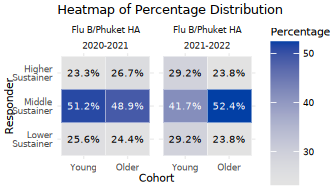

In [43]:
df_table <- df_table %>%
  mutate(TextColor = ifelse(Percentage > 40, "white", "black"))

options(repr.plot.width = 70/25.4, repr.plot.height = 40/25.4)

p <- ggplot(df_table, aes(x = Cohort, y = Responder, fill = Percentage)) +
  geom_tile(color = "white") +
  geom_text(aes(label = sprintf("%.1f%%", Percentage), color = TextColor),
            size = 2.1, show.legend = FALSE) +
  facet_wrap(~Assay + Flu_Year) +
  scale_fill_gradientn(colors = hcl.colors(50, "Blues 2", rev = TRUE)) +
  scale_color_identity() +
  theme_minimal(base_size = 6) +
  labs(
    title = "Heatmap of Percentage Distribution",
    x = "Cohort", y = "Responder", fill = "Percentage"
  )

p
ggsave('FigureC.pdf', p, width = 70/25.4, height = 40/25.4)